### **Exercise 1** Motivation and Foundations

This first exercise aims to familiarize with tools for Quantum computing. We will
- define and play around with first Quantum circuits,
- grant room to recall Python and complex numbers.

Useful material:
- Qiskit (SDK for Quantum Computing)
    - [Documentation](https://qiskit.org/documentation/getting_started.html)
    - [Textbook (Introduction to Quantum Computing)](https://learn.qiskit.org/course/introduction/why-quantum-computing)
- Python
    - [Documentation and tutorial](https://docs.python.org/3/index.html)
    - [Complex class (built-in complex numbers)](https://docs.python.org/3/library/numbers.html?highlight=complex#numbers.Complex)
    - [cmath (complex math package)](https://docs.python.org/3/library/cmath.html)
- Complex numbers
    - [Wikipedia](https://en.wikipedia.org/wiki/Complex_number)

In [1]:
# imports and utilities
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
import math
import cmath
from string import Template
from IPython.display import Math
import matplotlib.pyplot as plt

def display_math(term, subs):
    latex = Template(term).substitute(**subs)
    display(Math(latex))

#### **Exercise 1.1** A first Quantum circuit

Discuss the following Qiskit code (next cell) and represented circuit.
1. What are the parts of the circuit (how does it compare to classical algorithms)?
2. What is the expected behavior?

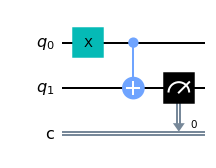

In [2]:
qc = QuantumCircuit(2,1)

# input
qc.x(0)

# processing
qc.cx(0,1)

# output
qc.measure(1,0)

# draw circuit
qc.draw(output="mpl")

#### **Solution 1.1**

1. 
    - _Input_: Use NOT-gates ($X$) to initialize register from $\lvert 0\ldots 0\rangle$
    - _Processing_: Apply gates (unitary operators)
    - _Output_: Measure against computational basis, read out results into classical bits

2. 
    1. Quantum computer will initialize state to $\lvert 00\rangle$
    2. $X$-gate on $q_0$ will turn state into $\lvert 10\rangle$
    3. $CX$-gate (control on $q_0$, target on $q_1$) will turn state into $\lvert 11\rangle$
    4. Measurement of $q_0$ will yield $c_0=1$

#### **Exercise 1.2** A first Quantum calculation

Run the circuit from Exercise 1.1 (next cell). 
1. Interpret the result.
2. Play around with the circuit by modifying inputs, processing gates, measurement.

In [3]:
# run circuit
sim = AerSimulator()
job = sim.run(qc)
result = job.result()
result.get_counts()

{'1': 1024}

#### **Solution 1.2**

1. As described in Solution 1.2.2, the result $c_0=1$ is certain. Hence, all shots (runs of the quantum circuit) provide the same result (running on real quantum hardware might differ due to noise).
2. See cell below.

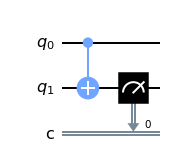

{'0': 1024}

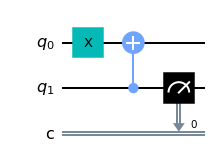

{'0': 1024}

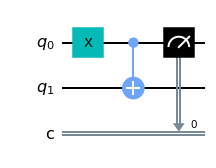

{'1': 1024}

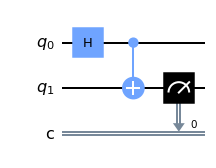

{'0': 524, '1': 500}

In [24]:
def draw_run_circuit(qc):
    display(qc.draw(output="mpl"))
    display(sim.run(qc).result().get_counts())

qc0 = QuantumCircuit(2,1)
qc0.cx(0,1)
qc0.measure(1,0)

qc1 = QuantumCircuit(2,1)
qc1.x(0)
qc1.cx(1,0)
qc1.measure(1,0)

qc2 = QuantumCircuit(2,1)
qc2.x(0)
qc2.cx(0,1)
qc2.measure(0,0)

qc3 = QuantumCircuit(2,1)
qc3.h(0)
qc3.cx(0,1)
qc3.measure(1,0)

draw_run_circuit(qc0)
draw_run_circuit(qc1)
draw_run_circuit(qc2)
draw_run_circuit(qc3)

#### **Exercise 1.3** Complex numbers

This exercise should refresh your knowledge and proficiency with complex numbers. 
Given $x=3+4i$ and $y=2−i$:

1. Compute
    - $x+y$
    - $x\cdot y$
    - $\overline{x}$ (complex conjugate of $x$)
    - $\overline{\overline{x}}$ (complex conjugate of complex conjugate of $x$)
    - $|x|$ and $\arg(x)$ (argument), such that $x=|x|e^{i\arg(x)}$
    - $x\cdot\overline{x}$
    - $\dfrac{1}{x}$
    
2. Draw $x$ in the complex plane, and interpret $\overline{x}$, $|x|$ and $\arg(x)$ geometrically.

3. How can one construct $x+y$ and $x\cdot y$ geometrically in the complex plane?

#### **Solution 1.3**

1. 
    - $x+y=(3+2)+(4-1)i=5+3i$
    - $x\cdot y=3\cdot 2+3\cdot(-1)\cdot i+4\cdot 2\cdot i+4\cdot(-1)\cdot i^2=(6+4)+(-3+8)i=10+5i$
    - $\overline{x}=3-4i$
    - $\overline{\overline{x}}=3-(-4i)=3+4i=x$
    - $|x|=\sqrt{|3|^2+|4|^2}=5$
    - $\arg(x)=\arctan(4/3)$
    - $x\cdot\overline{x}=(3+4i)(3-4i)=3^2-(4i)^2=25=|x|^2$
    - $\dfrac{1}{x}=\dfrac{1}{3+4i}\cdot\dfrac{3-4i}{3-4i}=\dfrac{3}{25}-\dfrac{4}{25}i$
    
2. 
    - $x$: position vector
    - $\overline{x}$: mirror $x$ on real axis
    - $|x|$: length of position vector
    - $\arg(x)$: angle of real axis to position vector

3. 
    - $x+y$: add position vectors by parallelogram rule
    - $x\cdot y$: add arguments and multiply lengths of position vectors

#### **Exercise 1.4** Complex numbers with Python

Solve Exercise 1.3 with help of Python (using the wire frame given by next cell).

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

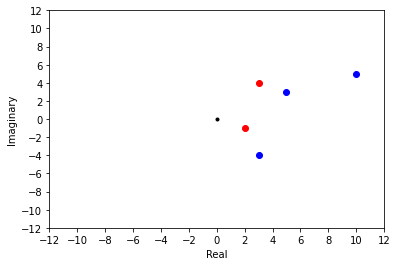

In [41]:
x = 3+4j
y = 2-1j

display_math("x+y=$val", {"val": x+y})
display_math("x\\cdot y=$val", {"val": x*y})
display_math("\\overline{x}=$val", {"val": x.conjugate()})
display_math("x=$abs \\cdot e^{$arg\cdot i}", {"abs": abs(x), "arg": cmath.phase(x)})
display_math("x\\cdot\\overline{x}=$val", {"val": x*x.conjugate()})
display_math("1/x=$val", {"val": 1/x})

plt.xlabel("Real")
plt.xlim([-12, 12])
plt.xticks(range(-12,13,2))
plt.ylabel("Imaginary")
plt.ylim([-12, 12])
plt.yticks(range(-12,13,2))

plt.plot(0, 0, "k.")
plt.plot(x.real, x.imag, "ro")
plt.plot(y.real, y.imag, "ro")
plt.plot(x.conjugate().real, x.conjugate().imag, "bo")
plt.plot((x+y).real, (x+y).imag, "bo")
plt.plot((x*y).real, (x*y).imag, "bo")

plt.show()